# **Détection des Robots dans les Enchères en Ligne**

L'objectif principal de ce projet de machine learning est d'identifier les robots, ou "bots", parmi les utilisateurs participant à des enchères en ligne. Les bots sont des entités automatisées qui peuvent perturber le fonctionnement normal d'une plateforme de vente aux enchères, souvent en plaçant des offres de manière inappropriée ou frauduleuse. La détection de ces bots est cruciale pour maintenir l'intégrité et la fiabilité de la plateforme, assurant ainsi une expérience équitable et transparente pour les utilisateurs humains.

### **Description du Jeu de Données**

Le jeu de données se divise en deux ensembles principaux : l'un contenant des informations sur les enchérisseurs et l'autre sur les enchères elles-mêmes. 

1. **Ensemble de Données des Enchérisseurs**: Ce fichier (`train.csv` pour l'entraînement et `test.csv` pour le test) comprend des données sur les enchérisseurs, telles que leur identifiant (`bidder_id`), leur compte de paiement (`payment_account`), leur adresse postale (`address`), et un label (`outcome`) indiquant si l'enchérisseur est un robot (1.0) ou un humain (0.0).

2. **Ensemble de Données des Enchères** (`bids.csv`): Ce fichier comprend des détails sur 7,6 millions d'enchères effectuées via des appareils mobiles. Les champs incluent l'identifiant unique de l'enchère (`bid_id`), l'identifiant de l'enchérisseur (`bidder_id`), l'identifiant de la vente aux enchères (`auction`), la catégorie de la marchandise (`merchandise`), le modèle du téléphone de l'enchérisseur (`device`), l'heure de l'enchère (`time`), le pays de l'enchérisseur (`country`), son adresse IP (`ip`), et l'URL de référence (`url`).

### **Pourquoi le Projet est Intéressant**

Ce projet est fascinant car il combine les défis de la détection de fraude, de l'analyse comportementale et de l'apprentissage automatique. En identifiant avec précision les bots, on peut non seulement protéger les intérêts économiques des plateformes d'enchères en ligne, mais aussi améliorer la confiance et la sécurité des utilisateurs réels. En outre, l'étude des schémas d'enchères et des comportements des enchérisseurs offre des insights précieux dans le domaine de la cybersécurité et de l'analyse de données.

## **Importation des bibliothèques**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **Lire les fichiers de données**

In [2]:
bids_df = pd.read_csv('C:/Users/Pc/Downloads/bids.csv')
train_df = pd.read_csv('C:/Users/Pc/Downloads/train_copie.csv')

## **Nettoyage de données**

Dans cette phase cruciale de notre projet de détection des robots dans les enchères en ligne, nous avons adopté une démarche méthodique pour nettoyer et préparer nos datasets, garantissant ainsi la fiabilité de nos analyses ultérieures.

#### **Exploration et Compréhension des Données** : 
Nous avons procédé à une inspection approfondie des datasets, en examinant les types de données, la structure des colonnes et en obtenant un aperçu des données à travers les premières lignes. Cette exploration nous a permis de mieux comprendre la nature et la composition de nos données.

#### **Identification et Gestion des Valeurs Manquantes** : 
Une analyse minutieuse a révélé la présence de valeurs manquantes dans la colonne 'country' du dataset des enchères. Nous avons quantifié ces absences et constaté qu'elles représentaient une faible proportion du dataset, ce qui a orienté notre stratégie de traitement.

#### **Analyse de la Distribution des Pays** : 
En visualisant la distribution des pays, nous avons identifié une prédominance marquée d'un pays spécifique. Cette observation a été déterminante dans notre choix de stratégie d'imputation pour les valeurs manquantes.

#### **Imputation par la Mode** : 
Compte tenu de la distribution fortement biaisée observée, nous avons décidé d'imputer les valeurs manquantes dans la colonne 'country' par la valeur la plus fréquente, c'est-à-dire le mode. Cette approche est couramment utilisée pour les données catégorielles et s'avère efficace dans des situations où une catégorie domine nettement les autres.

In [3]:
# Afficher des infos sur les colonnes et les types de données de l'ensemble de données des enchères
print("-Infos sur les colonnes et les types de données de la dataset des enchères:")
print(bids_df.info())

# Afficher la dimension de la dataset des enchères
print("\n-La dimension de la dataset des enchères est:", bids_df.shape)


# Afficher les premières lignes da la dataset des enchères
print("\n-Les premières lignes de la dataset des enchères:")
bids_df.head()

-Infos sur les colonnes et les types de données de la dataset des enchères:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7656334 entries, 0 to 7656333
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   bid_id       int64 
 1   bidder_id    object
 2   auction      object
 3   merchandise  object
 4   device       object
 5   time         int64 
 6   country      object
 7   ip           object
 8   url          object
dtypes: int64(2), object(7)
memory usage: 525.7+ MB
None

-La dimension de la dataset des enchères est: (7656334, 9)

-Les premières lignes de la dataset des enchères:


,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


In [4]:
# Afficher des infos sur les colonnes et les types de données de l'ensemble de données des enchérisseurs
print("-Infos sur les colonnes et les types de données de la dataset des enchérisseurs:")
print(train_df.info())

# Afficher la dimension de la dataset des enchérisseurs
print("\n-La dimension de la dataset des enchérisseurs est:", train_df.shape)

# Afficher le nombre des enchérisseurs humains (0) et robotiques (1)
print("\n-Le nombre des enchérisseurs humains (0.0) et ceux robotiques (1.0) est:")
display(train_df['outcome'].value_counts())

# Afficher les premières lignes da la dataset des enchérisseurs
print("\n-Les premières lignes de la dataset des enchérisseurs:")
train_df.head()

-Infos sur les colonnes et les types de données de la dataset des enchérisseurs:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2013 entries, 0 to 2012
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bidder_id        2013 non-null   object 
 1   payment_account  2013 non-null   object 
 2   address          2013 non-null   object 
 3   outcome          2013 non-null   float64
dtypes: float64(1), object(3)
memory usage: 63.0+ KB
None

-La dimension de la dataset des enchérisseurs est: (2013, 4)

-Le nombre des enchérisseurs humains (0.0) et ceux robotiques (1.0) est:


outcome
0.0    1910
1.0     103
Name: count, dtype: int64


-Les premières lignes de la dataset des enchérisseurs:


,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


Nous allons commencer à nettoyer les deux datasets, en étudiant les valeurs manquantes

In [5]:
print("\nValeurs manquantes pour chaque colonne dans l'ensemble de données des enchères :")
print(bids_df.isnull().sum())
print("\nValeurs manquantes pour chaque colonne dans l'ensemble de données des enchèrisseurs :")
print(train_df.isnull().sum())


Valeurs manquantes pour chaque colonne dans l'ensemble de données des enchères :
bid_id            0
bidder_id         0
auction           0
merchandise       0
device            0
time              0
country        8859
ip                0
url               0
dtype: int64

Valeurs manquantes pour chaque colonne dans l'ensemble de données des enchèrisseurs :
bidder_id          0
payment_account    0
address            0
outcome            0
dtype: int64


La dataset des enchérisseurs ne contient aucune valeur manquante. Cependant, celle des enchères contient 8859 valeurs manquantes dans la colonne 'country' 

In [6]:
# Calculer le pourcentage des données manquantes dans la colonne 'country'
missing_percent = bids_df['country'].isnull().mean()
print(f"Le pourcentage des données manquantes dans la colonne \"country\" est: {missing_percent*100: .2f}%")

Le pourcentage des données manquantes dans la colonne "country" est:  0.12%


Nous constatons que seule la colonne 'country' comporte des valeurs manquantes, et cela ne représente qu'une petite proportion de l'ensemble du jeu de données.

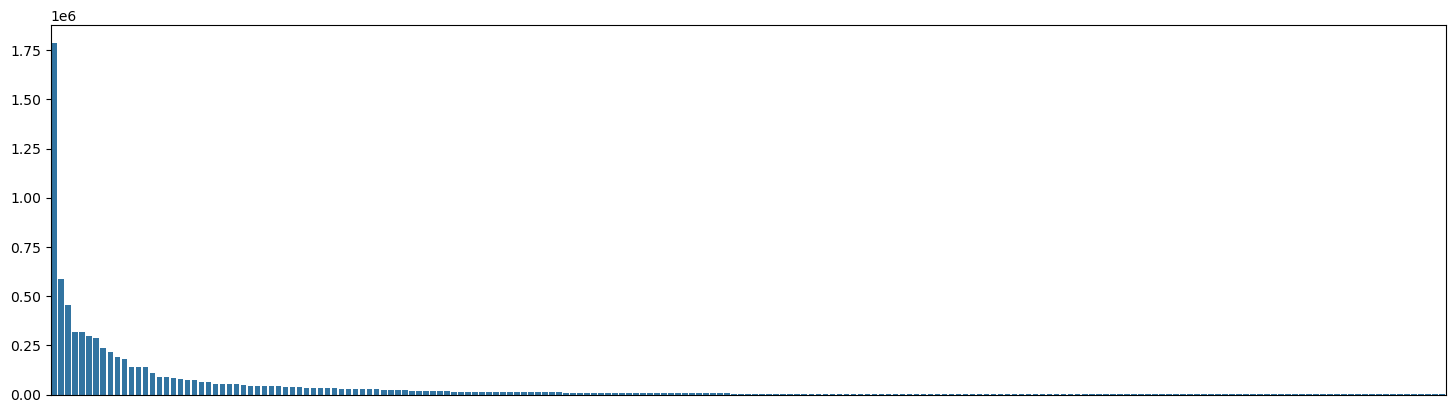

In [7]:
# Afficher la distribution des pays
unique_countries = bids_df['country'].value_counts()

fig, ax = plt.subplots(figsize = (18, 4.8))
countries_distribution = sns.barplot(x = unique_countries.index, y = unique_countries.values, ax = ax)                        
ax.get_xaxis().set_visible(False)

plt.show()

Nous vérifions la distribution des pays et constatons qu'il y a un pays qui est nettement plus élevé que les autres. Par conséquent, l'imputation par le mode 'la valeur la plus fréquente' pourrait être une bonne approche.

In [8]:
bids_df['country'] = bids_df['country'].fillna(bids_df['country'].mode()[0])

## **Analyse exploratoire des données (AED)**

Dans cette section, nous avons effectué une analyse exploratoire approfondie des données après avoir joint les deux datasets principaux. Notre objectif était de comprendre en profondeur le comportement des enchérisseurs et d'identifier les caractéristiques distinctives des enchères robotiques.

### Jointure des Datasets
- **Élimination des Colonnes Insignificatives** : Nous avons commencé par joindre les datasets des enchérisseurs et des enchères, tout en éliminant les colonnes 'payment_account' et 'address' pour simplifier l'analyse.
- **Création d'un Dataset Unique** : La jointure a permis de rassembler toutes les informations pertinentes dans un seul dataset, facilitant ainsi les analyses ultérieures.

### Nettoyage Post-Jointure
- **Identification des Valeurs Manquantes** : Après la jointure, nous avons identifié les valeurs manquantes, notamment 29 'bid_id' uniques.
- **Évaluation de l'Impact** : Nous avons examiné les 'bidder_id' associés à ces 'bid_id' manquants pour déterminer l'impact de ces absences sur l'analyse.

### Analyse des Données Manquantes
- **Analyse du 'Outcome'** : En vérifiant le 'outcome' des 'bidder_id' correspondants, nous avons constaté qu'ils étaient tous des humains.
- **Décision d'Élimination** : Cette observation a conduit à la décision d'éliminer ces données de notre ensemble, minimisant ainsi l'impact sur l'analyse des comportements des robots.

### Statistiques des Caractéristiques
- **Nombre Unique de Chaque Caractéristique** : Nous avons compté le nombre unique de divers attributs comme les enchères, les enchérisseurs, les ventes aux enchères, etc., pour évaluer la diversité de notre dataset.

### Analyse de la Distribution des Enchères
- **Quantification des Enchères Robotiques vs. Humaines** : Nous avons calculé le nombre total d'enchères effectuées par les robots et par les humains, ainsi que leur ratio.
- **Insights Quantitatifs** : Cette analyse a fourni des insights quantitatifs importants sur la répartition des enchères robotiques par rapport aux enchères humaines.

### Visualisation
- **Diagramme en Secteurs** : Nous avons utilisé un diagramme en secteurs pour visualiser la proportion des enchères robotiques par rapport aux enchères humaines.
- **Interprétation Visuelle** : Cette visualisation facilite la compréhension de la distribution des types d'enchères dans notre dataset.

In [9]:
bids_joined_df = train_df.merge(bids_df, on='bidder_id', how='left').drop(columns = ['payment_account', 'address'], errors = 'ignore')

In [10]:
# Afficher la dimension de la dataset jointe
bids_joined_df.shape

(3071253, 10)

Nous allons encore nettoyer la dataset jointe des enchères, en analysant les valeurs manquantes si elles existent

In [11]:
bids_joined_df.isnull().sum()

bidder_id       0
outcome         0
bid_id         29
auction        29
merchandise    29
device         29
time           29
country        29
ip             29
url            29
dtype: int64

On remarque qu'il y a 29 bid_id unique manquant, nous allons vérifier leur valeur 'outcome' pour pouvoir conclure sur l'importance des données manquantes

In [12]:
# Trouver le nombre des bidder_id uniques pour les valeurs manquantes de la colonne 'bid_id'.
unique_bidder_ids_for_missing_bid_ids = bids_joined_df[pd.isnull(bids_joined_df['bid_id'])]['bidder_id'].unique()
print(len(unique_bidder_ids_for_missing_bid_ids))
display(unique_bidder_ids_for_missing_bid_ids)

29


array(['5f50c6187a179e2ee7ba2fbcfc845c7a1smgr',
       '02bde521e763e4f4e590e8368149e04a96il9',
       'dd661e2d6e79a5b3e66c82373d50f3ee86k85',
       '908ce7060337fd8550760a100921f6f7wsemn',
       'b64c209b3d1d91a663d134961af89125u0s9a',
       '96b1df591dbbf3a002578574671d9ff1rmzev',
       'd2138bce99f535c244dab68652ccfa2enshxk',
       'c08e5e3325e2f4fea171f24ca018e675we8kj',
       '187636e527504df29bf42d4a2b7767e54bgv7',
       '74f153bd134afc92866a6bc5cceb2088120y0',
       '4b3e6a8a52c413a32f76a6d7a84a54bb8gb0t',
       '4d0d345f552877998f41ba3cd1ba299885vu5',
       '59fe751fb6c277016b7ebe3609aa1b15vhg7w',
       'd1780c224460a0c20d5c2f5f68714c5264xd0',
       'dc9a7ebdb6fb8dd3267ac26dbe5a62b68e4vw',
       '1e3642857c10e72cedaf7890e3c07bfa8ibzv',
       '4444bfb455b90711234e0c25345abbaddrt0x',
       'c62a6956e93ac3b56b1292f2c2d85b1fyekav',
       '1214fbf35079e7afc0a35645f8be8b218fd5o',
       'f9378eb3e522beef7e6a4e1f275bbe0eaboro',
       '977436b0a445fa555d537fbf1d4bff2e

In [13]:
# Vérifier le 'outcome' des bid_id manquants pour voir s'il est significatif ou négligeable
outcome_for_missing_bid_ids = bids_joined_df[bids_joined_df['bidder_id'].isin(unique_bidder_ids_for_missing_bid_ids)]['outcome']
print(outcome_for_missing_bid_ids)

17583      0.0
42424      0.0
129439     0.0
214915     0.0
221776     0.0
226432     0.0
255107     0.0
305088     0.0
333331     0.0
409451     0.0
654549     0.0
657208     0.0
788183     0.0
790914     0.0
794927     0.0
810369     0.0
883351     0.0
1018748    0.0
1019599    0.0
1021349    0.0
1123023    0.0
1139921    0.0
1217466    0.0
1465813    0.0
1482542    0.0
1648201    0.0
1974826    0.0
2139077    0.0
2999380    0.0
Name: outcome, dtype: float64


Nous constatons qu'ils sont tous des humains, ainsi nous pouvons les éliminer de l'ensemble de données

In [14]:
bids_new_df = bids_joined_df[~bids_joined_df['bidder_id'].isin(unique_bidder_ids_for_missing_bid_ids)]

In [15]:
# Vérifier le nombre unique de chaque caractéristique
print(f"total row in bid:          {len(bids_new_df)}")
print(f"total bids in bid:         {len(bids_new_df['bid_id'].unique())}")
print(f"total bidder in bids:      {len(bids_new_df['bidder_id'].unique())}")
print(f"total auction in bids:     {len(bids_new_df['auction'].unique())}")
print(f"total merchandise in bids: {len(bids_new_df['merchandise'].unique())}")
print(f"total device in bids:      {len(bids_new_df['device'].unique())}")
print(f"total country in bids:     {len(bids_new_df['country'].unique())}")
print(f"total ip in bids:          {len(bids_new_df['ip'].unique())}")
print(f"total url in bids:         {len(bids_new_df['url'].unique())}")

total row in bid:          3071224
total bids in bid:         3071224
total bidder in bids:      1984
total auction in bids:     12740
total merchandise in bids: 10
total device in bids:      5729
total country in bids:     198
total ip in bids:          1030950
total url in bids:         663873


Total des enchères placées par les robots: 412416
Total des enchères placées par les humains:  2658808
Le ratio des enchères robotiques vs. enchères humaines est:  0.15511311835980635


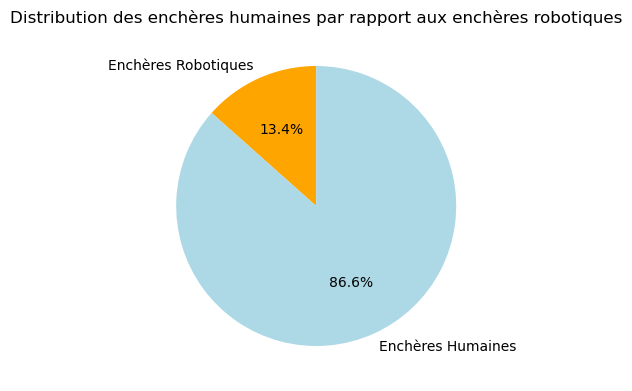

In [16]:
# Afficher la distribution des enchères humaines par rapport aux enchères robotiques dans l'ensemble de données
robot_bids = len(bids_new_df[bids_new_df['outcome'] == 1])
human_bids = len(bids_new_df[bids_new_df['outcome'] == 0])
print(f"Total des enchères placées par les robots: {robot_bids}")
print(f"Total des enchères placées par les humains:  {human_bids}")
print(f"Le ratio des enchères robotiques vs. enchères humaines est:  {robot_bids/human_bids}")

# Visualiser la distribution des enchères humaines par rapport aux enchères robotiques
# Données pour la visualisation
labels = ['Enchères Robotiques', 'Enchères Humaines']
sizes = [robot_bids, human_bids]

# Plot
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['orange', 'lightblue'])
plt.title('Distribution des enchères humaines par rapport aux enchères robotiques')
plt.gca().set_position([0.5, 0.5, 0.5, 0.5])
plt.show()


## **Feature Engineering**

#### Objectif
L'objectif de cette étape est de construire des caractéristiques (features) informatives à partir des datasets pour entraîner efficacement nos modèles de machine learning. Nous cherchons à capter des aspects cruciaux du comportement des enchérisseurs, en particulier ceux qui distinguent les bots des humains.

#### Méthodologie
1. **Calcul du Nombre d'Éléments Uniques** : Utilisation de `.nunique()` pour déterminer le nombre de valeurs uniques pour chaque caractéristique dans le jeu de données.

2. **Création de Features de Base** : Fusion des données des enchérisseurs avec ces comptages uniques et renommage des colonnes pour une meilleure lisibilité.

3. **Calcul des Différences Temporelles** : Utilisation de `.diff()` pour calculer la différence de temps entre les enchères consécutives, nous aidant à comprendre les modèles de comportement en fonction du temps.

4. **Statistiques des Intervalle de Temps** : Génération de caractéristiques telles que la moyenne, la médiane, l'écart-type, et d'autres statistiques des intervalles de temps entre les enchères.

5. **Identification des Enchères Concurrentes** : Détection des enchères où la différence de temps est nulle, suggérant une activité potentiellement automatisée.

6. **Analyse de la Position dans les Enchères** : Création de features pour identifier si un enchérisseur est souvent le premier ou le dernier à enchérir dans une vente aux enchères.

7. **Rapport des Enchères dans la Durée de la Vente** : Analyse du moment des enchères (première moitié vs seconde moitié) par rapport à la durée totale de l'enchère.

8. **Enchères Maximales dans une Vente** : Évaluation du nombre maximal d'enchères qu'un enchérisseur fait dans une seule vente aux enchères.

9. **Activité par Appareil** : Analyse du nombre maximal d'enchères faites par un enchérisseur avec le même appareil et par vente aux enchères.

10. **Normalisation et Création de Ratios** : Création de features normalisées telles que le pourcentage d'enchères concurrentes et les enchères par vente aux enchères, pour capturer des patterns comportementaux.

#### Visualisation des Features
- Nous avons visualisé les caractéristiques pour détecter les différences entre les bots et les humains.
- Des graphiques de densité ont été utilisés pour comparer les distributions des features entre les deux groupes.

### Caractéristiques des comptes uniques en utilisant .nunique()
Ici, nous utilisons la méthode `.nunique()` pour obtenir le nombre d'éléments uniques dans chaque caractéristique de l'ensemble de donnée global. En d'autres termes, nous comptons le nombre de valeurs différentes pour chaque variable (caractéristique) dans le jeu de données.

In [17]:
bidder_unique = bids_df.groupby("bidder_id").nunique().reset_index()
bidder_unique.head()

,bidder_id,bid_id,auction,merchandise,device,time,country,ip,url
0,001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1,1
1,002d229ffb247009810828f648afc2ef593rb,2,1,1,2,2,1,1,1
2,0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3,3,1,3,3,1,3,2
4,00486a11dff552c4bd7696265724ff81yeo9v,20,13,1,8,20,1,10,7


In [18]:
bidder_unique.shape

(6614, 9)

In [19]:
bids_set = train_df.merge(bidder_unique, on='bidder_id', how='left').drop(columns = ['payment_account', 'address'], errors = 'ignore')
bids_set = bids_set.rename(columns = {'bid_id': 'num_bids', 'auction': 'num_auct', 'merchandise': 'num_merch_type', 'device': 'num_device_type', 'time': 'num_time', 'country': 'num_ctry', 'ip': 'num_ip', 'url': 'num_url'})
bids_set = bids_set.fillna(0)

bids_set.head()

,bidder_id,outcome,num_bids,num_auct,num_merch_type,num_device_type,num_time,num_ctry,num_ip,num_url
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,24.0,18.0,1.0,14.0,24.0,6.0,20.0,1.0
1,624f258b49e77713fc34034560f93fb3hu3jo,0.0,3.0,1.0,1.0,2.0,3.0,1.0,3.0,2.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,0.0,4.0,4.0,1.0,2.0,4.0,1.0,4.0,2.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,0.0,155.0,23.0,1.0,53.0,155.0,2.0,123.0,91.0


In [20]:
bids_set.shape

(2013, 10)

### Caractéristiques générées à partir de la différenciation première en utilisant .diff()

Ici, nous utilisons la méthode `.diff()` pour créer de nouvelles caractéristiques en calculant la différence entre chaque élément consécutif de la série de données. Plus précisement, Nous calculons la première différence entre chaque élément successif de la variable 'time' pour créer de nouvelles caractéristiques. Nous allons ainsi comparer les comportements en utilisant le temps.

In [21]:
time_df = bids_df.sort_values(['bidder_id', 'time'])
time_df.head(10)

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
7179832,7179832,001068c415025a009fee375a12cff4fcnht8y,4ifac,jewelry,phone561,9706345052631578,bn,139.226.147.115,vasstdc27m7nks3
1281292,1281292,002d229ffb247009810828f648afc2ef593rb,2tdw2,mobile,phone640,9766744105263157,sg,37.40.254.131,vasstdc27m7nks3
1281311,1281311,002d229ffb247009810828f648afc2ef593rb,2tdw2,mobile,phone219,9766744210526315,sg,37.40.254.131,vasstdc27m7nks3
6805028,6805028,0030a2dd87ad2733e0873062e4f83954mkj86,obbny,mobile,phone313,9704553947368421,ir,21.67.17.162,vnw40k8zzokijsv
3967330,3967330,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,obbny,mobile,phone420,9640018631578947,id,44.241.8.179,sj4jidex850loas
6166636,6166636,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,cqsh6,mobile,phone102,9700605052631578,id,190.88.89.83,sj4jidex850loas
7140567,7140567,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,efh5o,mobile,phone257,9705974315789473,id,115.47.140.180,vasstdc27m7nks3
2597846,2597846,00486a11dff552c4bd7696265724ff81yeo9v,no958,home goods,phone4,9632636526315789,ng,143.118.40.162,vasstdc27m7nks3
2599005,2599005,00486a11dff552c4bd7696265724ff81yeo9v,6plix,home goods,phone4,9632641157894736,ng,143.118.40.162,vasstdc27m7nks3
2750709,2750709,00486a11dff552c4bd7696265724ff81yeo9v,gst86,home goods,phone45,9633339684210526,ng,54.212.177.220,0wfuwlacucr1cdl


Nous pouvons générer des caractéristiques en examinant la différence de temps entre chaque paire d'enchères pour chaque enchérisseur. Nous ne pouvons pas prendre la première différence de la première enchère de chaque enchérisseur, ce qui entraîne des valeurs manquantes. Comme ces valeurs manquantes n'ont pas d'interprétations, nous les supprimons.

In [22]:
firstdiff = time_df.groupby('bidder_id')[['time']].diff()
firstdiff.head(10)

,time
7179832,NaN
1281292,NaN
1281311,1.052632e+08
6805028,NaN
3967330,NaN
6166636,6.058642e+13
7140567,5.369263e+12
2597846,NaN
2599005,4.631579e+09
2750709,6.985263e+11


In [23]:
time_df['first_diff'] = firstdiff
firstdiff_feat = time_df[['bidder_id', 'first_diff']].dropna()
firstdiff_feat.head()

,bidder_id,first_diff
1281311,002d229ffb247009810828f648afc2ef593rb,1.052632e+08
6166636,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,6.058642e+13
7140567,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,5.369263e+12
2599005,00486a11dff552c4bd7696265724ff81yeo9v,4.631579e+09
2750709,00486a11dff552c4bd7696265724ff81yeo9v,6.985263e+11


Nous pouvons générer certaines caractéristiques en utilisant des fonctions d'agrégation courantes telles que la moyenne, la médiane, le minimum et le maximum.

In [24]:
bid_intervals = firstdiff_feat.groupby('bidder_id')[['first_diff']].describe().reset_index()
bid_intervals = bid_intervals.droplevel(axis=1, level=0)
bid_intervals = bid_intervals.rename(columns = {'': 'bidder_id', 'mean': 'mean_diff', 'std': 'std_diff', '50%': 'median_diff', 'min': 'min_diff', 'max': 'max_diff'}).fillna(0)
bid_intervals['iqr_diff'] = bid_intervals['75%'] - bid_intervals['25%']
bid_intervals = bid_intervals.drop(['25%', '75%', 'count'], axis = 1)
bid_intervals.head()

,bidder_id,mean_diff,std_diff,min_diff,median_diff,max_diff,iqr_diff
0,002d229ffb247009810828f648afc2ef593rb,1.052632e+08,0.000000e+00,1.052632e+08,1.052632e+08,1.052632e+08,0.000000e+00
1,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3.297784e+13,3.904443e+13,5.369263e+12,3.297784e+13,6.058642e+13,2.760858e+13
2,00486a11dff552c4bd7696265724ff81yeo9v,4.018413e+12,1.153730e+13,3.684211e+08,9.177368e+11,5.094174e+13,1.696763e+12
3,0051aef3fdeacdadba664b9b3b07e04e4coc6,1.635106e+11,5.770740e+11,5.263158e+07,2.736842e+09,3.792368e+12,1.228947e+10
4,0053b78cde37c4384a20d2da9aa4272aym4pb,7.065316e+09,4.784394e+11,0.000000e+00,3.684211e+08,5.002753e+13,1.000000e+09


Lorsque nous ajoutons les caractéristiques ci-dessus à nos ensembles d'entraînement, nous remplissons les valeurs manquantes pour les enchères concurrentes avec 0, simplement parce que les enchérisseurs n'en ont pas.

Pour les caractéristiques de first_difference, nous remplissons les valeurs manquantes avec les valeurs médianes, car ces enchérisseurs n'ont aucune information d'enchère.

In [25]:
bids_set = bids_set.merge(bid_intervals, on='bidder_id', how='left')
bids_set.head()

,bidder_id,outcome,num_bids,num_auct,num_merch_type,num_device_type,num_time,num_ctry,num_ip,num_url,mean_diff,std_diff,min_diff,median_diff,max_diff,iqr_diff
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,24.0,18.0,1.0,14.0,24.0,6.0,20.0,1.0,5.711121e+11,7.438736e+11,5.210526e+09,3.458421e+11,3.167632e+12,6.250263e+11
1,624f258b49e77713fc34034560f93fb3hu3jo,0.0,3.0,1.0,1.0,2.0,3.0,1.0,3.0,2.0,3.233579e+12,1.759654e+12,1.989316e+12,3.233579e+12,4.477842e+12,1.244263e+12
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,0.0,4.0,4.0,1.0,2.0,4.0,1.0,4.0,2.0,2.379000e+12,8.618847e+11,1.450842e+12,2.532053e+12,3.154105e+12,8.516316e+11
3,4bee9aba2abda51bf43d639013d6efe12iycd,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,0.0,155.0,23.0,1.0,53.0,155.0,2.0,123.0,91.0,7.777888e+10,2.154285e+11,5.263158e+07,1.368421e+10,1.619211e+12,3.888158e+10


In [26]:
numeric_columns = bids_set.select_dtypes(include=[np.number])
bids_set[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.median())

bids_set.head()


,bidder_id,outcome,num_bids,num_auct,num_merch_type,num_device_type,num_time,num_ctry,num_ip,num_url,mean_diff,std_diff,min_diff,median_diff,max_diff,iqr_diff
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,24.0,18.0,1.0,14.0,24.0,6.0,20.0,1.0,5.711121e+11,7.438736e+11,5.210526e+09,3.458421e+11,3.167632e+12,6.250263e+11
1,624f258b49e77713fc34034560f93fb3hu3jo,0.0,3.0,1.0,1.0,2.0,3.0,1.0,3.0,2.0,3.233579e+12,1.759654e+12,1.989316e+12,3.233579e+12,4.477842e+12,1.244263e+12
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,0.0,4.0,4.0,1.0,2.0,4.0,1.0,4.0,2.0,2.379000e+12,8.618847e+11,1.450842e+12,2.532053e+12,3.154105e+12,8.516316e+11
3,4bee9aba2abda51bf43d639013d6efe12iycd,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.825926e+11,1.100401e+12,5.789474e+08,1.241184e+11,5.146526e+12,1.813816e+11
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,0.0,155.0,23.0,1.0,53.0,155.0,2.0,123.0,91.0,7.777888e+10,2.154285e+11,5.263158e+07,1.368421e+10,1.619211e+12,3.888158e+10


Nous observons, avec intérêt, que certains enchérisseurs ont un temps d'attente nul entre deux enchères. Intuitivement, les bots pourraient être capables de réaliser cela plus fréquemment qu'un être humain moyen. Ainsi, nous pouvons examiner les valeurs où la différence de temps est égale à 0. Nous étiquetons de telles enchères comme des enchères concurrentes.

In [27]:
concurrent_bids = firstdiff_feat[firstdiff_feat['first_diff'] == 0].groupby('bidder_id').count().reset_index()
concurrent_bids = concurrent_bids.rename(columns = {'first_diff': 'num_concurrent_bids'})
concurrent_bids.head()

,bidder_id,num_concurrent_bids
0,0053b78cde37c4384a20d2da9aa4272aym4pb,728
1,00a79ebd15f0b24a0a3b5794457cd8ed7dng1,29
2,00b519ec8ed5e370328451379bb708a306eoj,1
3,00e0f614d9dd32dd27f6080f472d2934emlos,15
4,019cf2d366df756c092c91e26f406acdozha7,1


In [28]:
bids_set = bids_set.merge(concurrent_bids, on='bidder_id', how='left').fillna(0)

### Caractéristiques générées à partir du temps en utilisant .first() 

Le temps peut être utilisé pour indiquer le comportement d'un enchérisseur par rapport aux autres. La comparaison la plus simple est le nombre de fois où un enchérisseur est le premier ou le dernier dans une enchère. Intuitivement, nous remplissons les valeurs manquantes avec 0.

In [29]:
first_bid = bids_df.sort_values(['auction', 'time'])
first_bid = first_bid.groupby('auction').first().reset_index()
first_bid = first_bid.groupby('bidder_id').count()['bid_id'].reset_index()
first_bid = first_bid.rename(columns = {'bid_id': 'num_first_bid'})
first_bid.head()

,bidder_id,num_first_bid
0,0053b78cde37c4384a20d2da9aa4272aym4pb,4
1,00a79ebd15f0b24a0a3b5794457cd8ed7dng1,7
2,00e0f614d9dd32dd27f6080f472d2934emlos,6
3,019cf2d366df756c092c91e26f406acdozha7,2
4,01cda526658455000913950f20cf31a2q6nsf,8


In [30]:
last_bid = bids_df.sort_values(['auction', 'time'], ascending = [True, False])
last_bid = last_bid.groupby('auction').first().reset_index()
last_bid = last_bid.groupby('bidder_id').count()['bid_id'].reset_index()
last_bid = last_bid.rename(columns = {'bid_id': 'num_last_bid'})
last_bid.head()

,bidder_id,num_last_bid
0,0053b78cde37c4384a20d2da9aa4272aym4pb,6
1,00b519ec8ed5e370328451379bb708a306eoj,1
2,00e0f614d9dd32dd27f6080f472d2934emlos,3
3,01067975436d123f717ee5aba0dd4bbfa0937,1
4,0113d101ec6aabd354adac645a1ec3e82ln88,1


In [31]:
bids_set = bids_set.merge(first_bid, on='bidder_id', how='left').fillna(0)
bids_set = bids_set.merge(last_bid, on='bidder_id', how='left').fillna(0)

### Caractéristiques générées à partir du ratio des enchères dans la première moitié par rapport à la deuxième moitié de la vente aux enchères

Nous définissons la durée de la vente aux enchères comme la différence entre la première et la dernière enchère de cette vente aux enchères. Nous supposons que les bots enchériront davantage vers la fin d'une vente aux enchères, car enchérir tôt ne garantit pas vraiment qu'une surenchère ne soit pas faite.

In [32]:
auct_duration = bids_df.sort_values(['auction', 'time'])[['bidder_id', 'auction', 'time']]
auct_duration = auct_duration[['auction','time']].groupby('auction').agg([max,min]).reset_index().droplevel(axis=1, level=0).rename(columns = {'': 'auction'})
auct_duration['auct_duration'] = auct_duration['max'] - auct_duration['min']
auct_duration.head()

C:\Users\Pc\AppData\Local\Temp\ipykernel_19344\2940439340.py:2: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  auct_duration = auct_duration[['auction','time']].groupby('auction').agg([max,min]).reset_index().droplevel(axis=1, level=0).rename(columns = {'': 'auction'})
C:\Users\Pc\AppData\Local\Temp\ipykernel_19344\2940439340.py:2: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  auct_duration = auct_duration[['auction','time']].groupby('auction').agg([max,min]).reset_index().droplevel(axis=1, level=0).rename(columns = {'': 'auction'})


,auction,max,min,auct_duration
0,00270,9709212894736842,9699049894736842,10163000000000
1,008vv,9760397157894736,9759369421052631,1027736842105
2,00cwr,9698636578947368,9695641631578947,2994947368421
3,00do0,9759865210526315,9759323842105263,541368421052
4,00hjy,9772723842105263,9759410368421052,13313473684211


In [33]:
time_ratio = bids_df.sort_values(['auction', 'time'])[['bidder_id', 'auction', 'time']]
time_ratio = time_ratio.merge(auct_duration, on = 'auction', how = 'left')
time_ratio.head()

,bidder_id,auction,time,max,min,auct_duration
0,92af1e40713e077ef87f5352fb56772fjnzm7,00270,9699049894736842,9709212894736842,9699049894736842,10163000000000
1,a939f51234ad2c44eb9ccc84e754f41foiv7g,00270,9699098210526315,9709212894736842,9699049894736842,10163000000000
2,92af1e40713e077ef87f5352fb56772fjnzm7,00270,9699195789473684,9709212894736842,9699049894736842,10163000000000
3,9655ccc7c0c193f1549475f02c54dce45kjw7,00270,9699392473684210,9709212894736842,9699049894736842,10163000000000
4,9655ccc7c0c193f1549475f02c54dce45kjw7,00270,9699474473684210,9709212894736842,9699049894736842,10163000000000


In [34]:
time_ratio['temp'] = time_ratio['time'] - time_ratio['auct_duration'] / 2
time_ratio.head()

,bidder_id,auction,time,max,min,auct_duration,temp
0,92af1e40713e077ef87f5352fb56772fjnzm7,00270,9699049894736842,9709212894736842,9699049894736842,10163000000000,9.693968e+15
1,a939f51234ad2c44eb9ccc84e754f41foiv7g,00270,9699098210526315,9709212894736842,9699049894736842,10163000000000,9.694017e+15
2,92af1e40713e077ef87f5352fb56772fjnzm7,00270,9699195789473684,9709212894736842,9699049894736842,10163000000000,9.694114e+15
3,9655ccc7c0c193f1549475f02c54dce45kjw7,00270,9699392473684210,9709212894736842,9699049894736842,10163000000000,9.694311e+15
4,9655ccc7c0c193f1549475f02c54dce45kjw7,00270,9699474473684210,9709212894736842,9699049894736842,10163000000000,9.694393e+15


In [35]:
time_ratio['firsthalf'] = time_ratio['temp'] < time_ratio['min']
time_ratio.head()

,bidder_id,auction,time,max,min,auct_duration,temp,firsthalf
0,92af1e40713e077ef87f5352fb56772fjnzm7,00270,9699049894736842,9709212894736842,9699049894736842,10163000000000,9.693968e+15,True
1,a939f51234ad2c44eb9ccc84e754f41foiv7g,00270,9699098210526315,9709212894736842,9699049894736842,10163000000000,9.694017e+15,True
2,92af1e40713e077ef87f5352fb56772fjnzm7,00270,9699195789473684,9709212894736842,9699049894736842,10163000000000,9.694114e+15,True
3,9655ccc7c0c193f1549475f02c54dce45kjw7,00270,9699392473684210,9709212894736842,9699049894736842,10163000000000,9.694311e+15,True
4,9655ccc7c0c193f1549475f02c54dce45kjw7,00270,9699474473684210,9709212894736842,9699049894736842,10163000000000,9.694393e+15,True


In [36]:
ratio_firsthalf = time_ratio[['bidder_id', 'firsthalf']].groupby('bidder_id').agg(['count', sum]).reset_index().droplevel(axis=1, level=0).rename(columns = {'': 'bidder_id', 'count': 'num_total_bids', 'sum': 'num_firsthalf_bids'})
ratio_firsthalf['num_secondhalf_bids'] = ratio_firsthalf['num_total_bids'] - ratio_firsthalf['num_firsthalf_bids']
ratio_firsthalf['percent_firsthalf_bids'] = ratio_firsthalf['num_firsthalf_bids'] / ratio_firsthalf['num_total_bids']
ratio_firsthalf['percent_secondhalf_bids'] = ratio_firsthalf['num_secondhalf_bids'] / ratio_firsthalf['num_total_bids']
ratio_firsthalf = ratio_firsthalf.drop('num_total_bids', axis = 1)
ratio_firsthalf.head()

C:\Users\Pc\AppData\Local\Temp\ipykernel_19344\2919906740.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  ratio_firsthalf = time_ratio[['bidder_id', 'firsthalf']].groupby('bidder_id').agg(['count', sum]).reset_index().droplevel(axis=1, level=0).rename(columns = {'': 'bidder_id', 'count': 'num_total_bids', 'sum': 'num_firsthalf_bids'})


,bidder_id,num_firsthalf_bids,num_secondhalf_bids,percent_firsthalf_bids,percent_secondhalf_bids
0,001068c415025a009fee375a12cff4fcnht8y,0,1,0.000000,1.000000
1,002d229ffb247009810828f648afc2ef593rb,2,0,1.000000,0.000000
2,0030a2dd87ad2733e0873062e4f83954mkj86,0,1,0.000000,1.000000
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,2,1,0.666667,0.333333
4,00486a11dff552c4bd7696265724ff81yeo9v,15,5,0.750000,0.250000


In [37]:
bids_set = bids_set.merge(ratio_firsthalf, on='bidder_id', how='left').fillna(0)

### Caractéristique du nombre maximal d'enchères dans une vente aux enchères

Puisque l'objectif des bots est de remporter la vente aux enchères, en supposant qu'un bot n'abandonnera pas une enchère, le bot devrait réaliser plus d'enchères pour toute vente aux enchères.

In [38]:
max_bids_in_auct = bids_df.groupby(['bidder_id', 'auction']).count().reset_index()[['bidder_id', 'auction', 'bid_id']].rename(columns = {'bid_id': 'max_bids_in_auct'})
max_bids_in_auct = max_bids_in_auct[['bidder_id', 'max_bids_in_auct']].groupby('bidder_id').max().reset_index()
max_bids_in_auct.head()

,bidder_id,max_bids_in_auct
0,001068c415025a009fee375a12cff4fcnht8y,1
1,002d229ffb247009810828f648afc2ef593rb,2
2,0030a2dd87ad2733e0873062e4f83954mkj86,1
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1
4,00486a11dff552c4bd7696265724ff81yeo9v,3


In [39]:
bids_set = bids_set.merge(max_bids_in_auct, on='bidder_id', how='left').fillna(0)

### Caractéristiques du nombre maximal d'enchères sur l'ensemble des appareils

Nous déterminons le nombre maximal d'enchères effectuées avec le même appareil par un enchérisseur et nous vérifions si les humains et les bots ont des comportements différents en ce qui concerne le changement d'appareils.

In [40]:
device = bids_df.groupby(['bidder_id', 'device']).nunique()[['bid_id', 'auction']].reset_index().rename(columns = {'bid_id': 'max_bids_per_device', 'auction': 'num_auct_per_device'})
device = device.groupby('bidder_id').max().reset_index()
device['max_bids_per_device_per_auct'] = device['max_bids_per_device'] / device['num_auct_per_device']
device = device[['bidder_id', 'max_bids_per_device', 'max_bids_per_device_per_auct']]
device.head()

,bidder_id,max_bids_per_device,max_bids_per_device_per_auct
0,001068c415025a009fee375a12cff4fcnht8y,1,1.0
1,002d229ffb247009810828f648afc2ef593rb,1,1.0
2,0030a2dd87ad2733e0873062e4f83954mkj86,1,1.0
3,003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,1,1.0
4,00486a11dff552c4bd7696265724ff81yeo9v,7,1.0


In [41]:
bids_set = bids_set.merge(device, on='bidder_id', how='left').fillna(0)

### Transformation des caractéristiques

Nous tentons de créer certaines caractéristiques qui ont du sens intuitivement. Par exemple, `bids_per_auct` peut être une caractéristique plus pertinente que simplement `num_bids` et `num_auct` séparément, car nous normalisons le nombre d'enchères faites par un enchérisseur par rapport au nombre total d'enchères auxquelles il a participé. Il en va de même pour les autres caractéristiques.

Encore une fois, nous remplissons les valeurs manquantes avec 0 car elles indiquent les enchérisseurs sans informations d'enchères.

In [42]:
bids_set['percent_concurrent_bids'] = bids_set['num_concurrent_bids'] / bids_set['num_bids']
bids_set['bids_per_auct'] = bids_set['num_bids'] / bids_set['num_auct']
bids_set['bids_per_device'] = bids_set['num_bids'] / bids_set['num_device_type']
bids_set['bids_per_url'] = bids_set['num_bids'] / bids_set['num_url']
bids_set['device_per_auct'] = bids_set['num_device_type'] / bids_set['num_auct']
bids_set['ip_per_ctry'] = bids_set['num_ip'] / bids_set['num_ctry']
bids_set['percent_max_bids'] = bids_set['max_bids_per_device'] / bids_set['num_bids']

bids_set = bids_set.fillna(0)

### Valeurs aberrantes

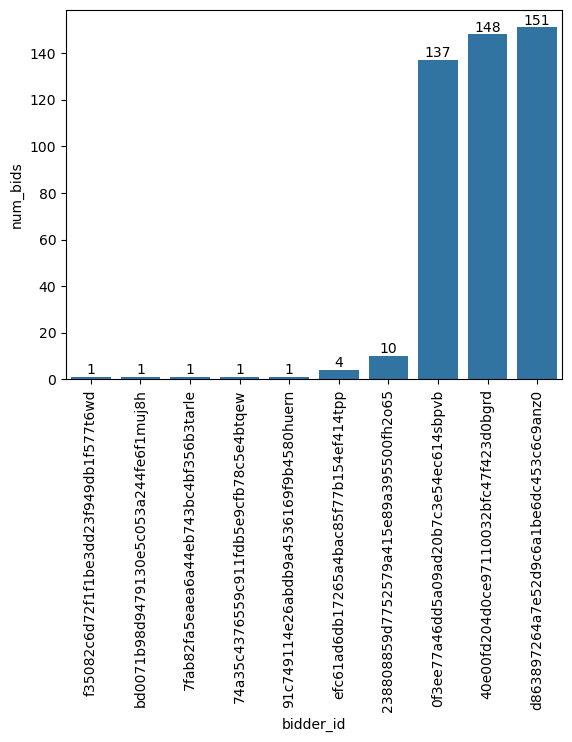

In [43]:
fig, ax = plt.subplots()
num_bids_per_bot = sns.barplot(data = bids_set[bids_set['outcome'] == 1].sort_values('num_bids').head(10),
                               x = 'bidder_id',
                               y = 'num_bids',
                               ax = ax
                              )
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 90)

plt.show()

Il y a des valeurs aberrantes, avec 5 bots n'ayant qu'une seule enchère. Nous les supprimons car elles pourraient avoir un impact

In [44]:
bids_set[bids_set['outcome'] == 1].sort_values('num_bids').head(6)

,bidder_id,outcome,num_bids,num_auct,num_merch_type,num_device_type,num_time,num_ctry,num_ip,num_url,...,max_bids_in_auct,max_bids_per_device,max_bids_per_device_per_auct,percent_concurrent_bids,bids_per_auct,bids_per_device,bids_per_url,device_per_auct,ip_per_ctry,percent_max_bids
615,f35082c6d72f1f1be3dd23f949db1f577t6wd,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.0
775,bd0071b98d9479130e5c053a244fe6f1muj8h,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.0
392,7fab82fa5eaea6a44eb743bc4bf356b3tarle,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.0
1669,74a35c4376559c911fdb5e9cfb78c5e4btqew,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.0
1102,91c749114e26abdb9a4536169f9b4580huern,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,1.0,1.000000,1.0,1.0,1.0,1.0
148,efc61ad6db17265a4bac85f77b154ef414tpp,1.0,4.0,2.0,1.0,3.0,4.0,2.0,3.0,1.0,...,3.0,2.0,2.0,0.0,2.0,1.333333,4.0,1.5,1.5,0.5


In [45]:
bids_set = bids_set.drop([615, 775, 392, 1669, 1102], axis = 0)

### Signification des caractéristiques ?

Nous allons maintenant vérifier la signification des caractéristiques en utilisant des graphiques de densité. 

In [46]:
all_features = bids_set.columns.drop(['bidder_id', 'outcome'])
all_features

Index(['num_bids', 'num_auct', 'num_merch_type', 'num_device_type', 'num_time',
       'num_ctry', 'num_ip', 'num_url', 'mean_diff', 'std_diff', 'min_diff',
       'median_diff', 'max_diff', 'iqr_diff', 'num_concurrent_bids',
       'num_first_bid', 'num_last_bid', 'num_firsthalf_bids',
       'num_secondhalf_bids', 'percent_firsthalf_bids',
       'percent_secondhalf_bids', 'max_bids_in_auct', 'max_bids_per_device',
       'max_bids_per_device_per_auct', 'percent_concurrent_bids',
       'bids_per_auct', 'bids_per_device', 'bids_per_url', 'device_per_auct',
       'ip_per_ctry', 'percent_max_bids'],
      dtype='object')

C:\Users\Pc\AppData\Local\Temp\ipykernel_19344\1120757739.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  bots = sns.kdeplot(data = bids_set[bids_set['outcome'] == 1],


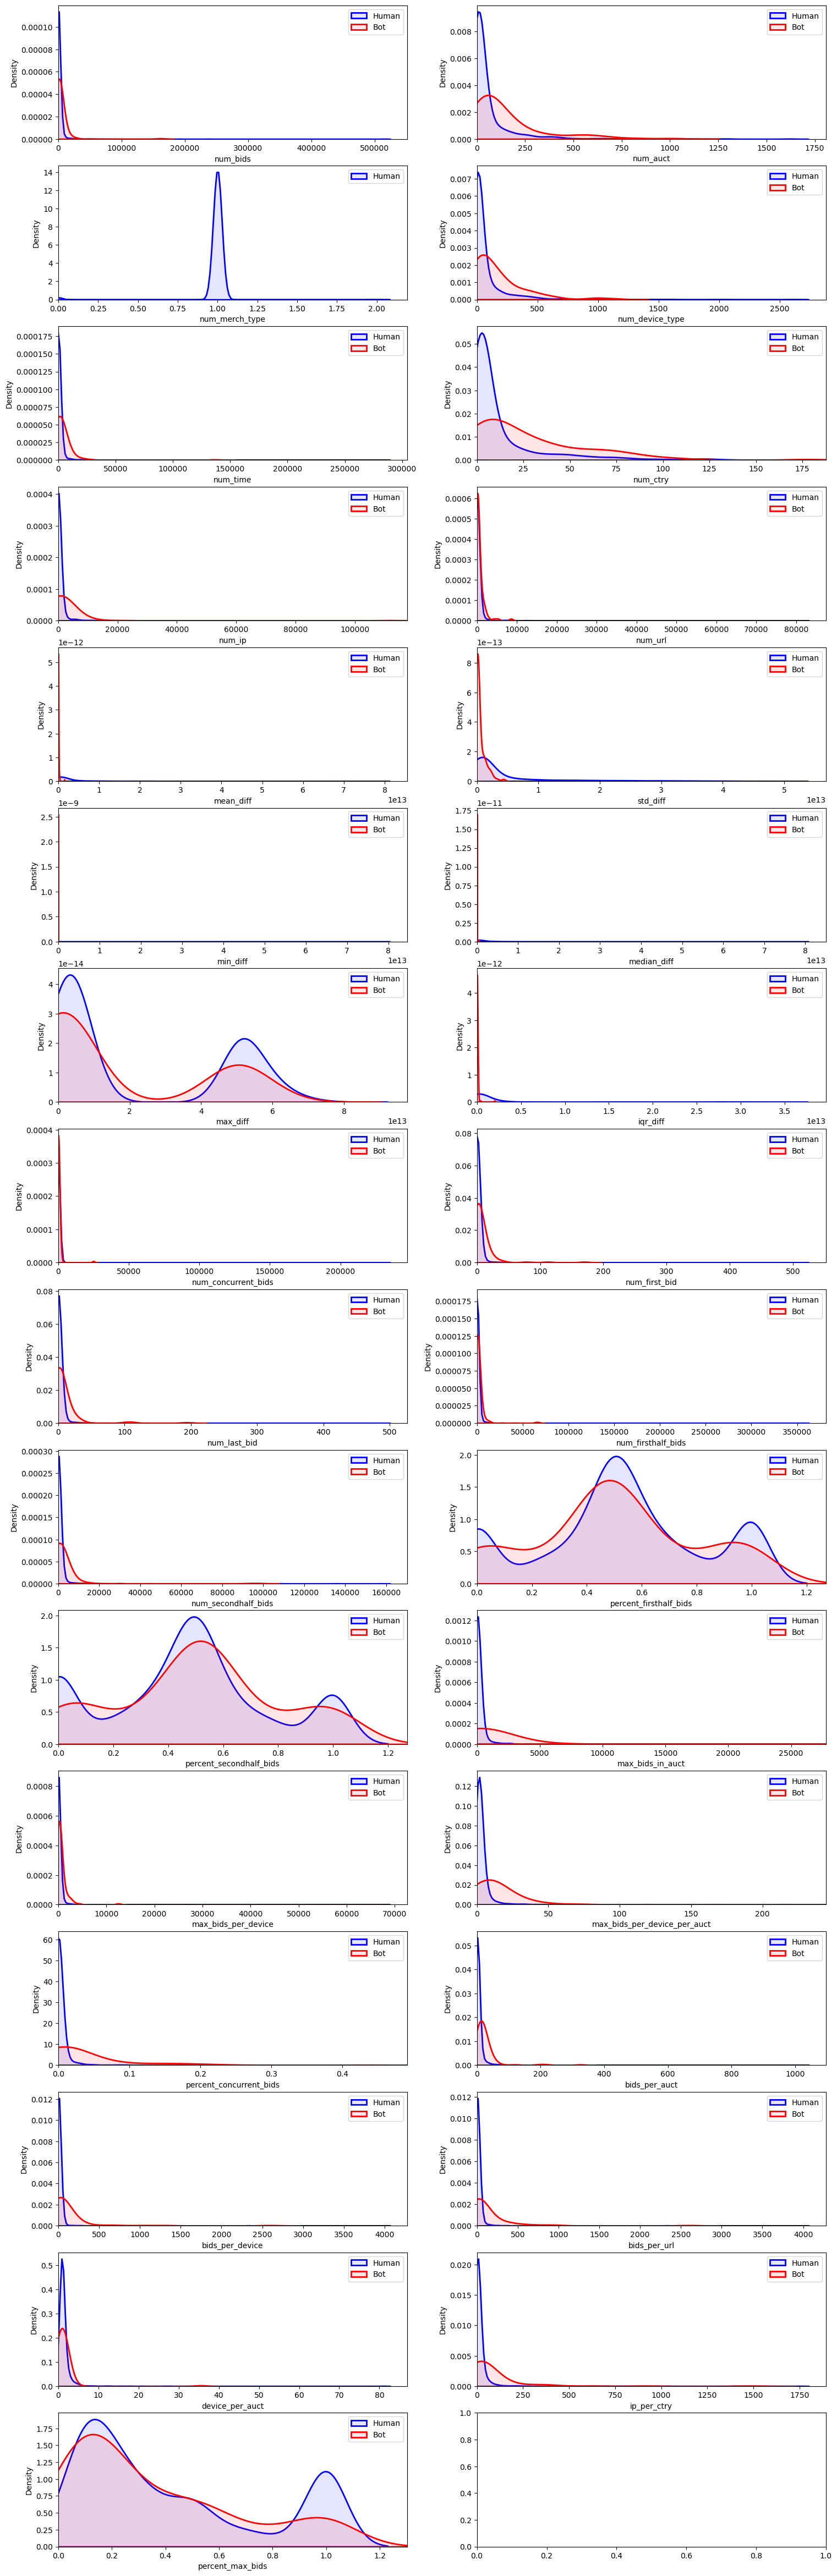

In [47]:
nrows = 16
ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (18, 60))
for i, column in enumerate(all_features):
    humans = sns.kdeplot(data = bids_set[bids_set['outcome'] == 0],
                x = column,
                ax = axes[i // ncols, i % ncols],
                color = 'blue',
                fill = True,
                alpha = 0.1,
                linewidth = 2,
                label = 'Human').set_xlim(left = 0)
    bots = sns.kdeplot(data = bids_set[bids_set['outcome'] == 1],
                x = column,
                ax = axes[i // ncols, i % ncols],
                color = 'red',
                fill = True,
                alpha = 0.1,
                linewidth = 2,
                label = 'Bot').set_xlim(left = 0)
    axes[i // ncols,i % ncols].legend()
    
plt.show()

À partir des graphiques ci-dessus: 
- La caractéristique `num_merch_type` ne représente qu'une distribution pour les humains.
- Les caractéristiques `num_url`, `num_concurrent_bids`, `num_firsthalf_bids`, `max_bids_per_device` ont des distributions similaires pour les humains et les bots. 

Par conséquent, nous choisissons de les exclure de notre modèle car elles pourraient ne pas aider à différencier efficacement un humain d'un bot.

In [48]:
bids_set = bids_set.drop(columns = ['num_merch_type', 'num_url', 'num_concurrent_bids', 'num_firsthalf_bids', 'max_bids_per_device'], errors = 'ignore')

In [49]:
selected_features = bids_set.columns.drop(['bidder_id', 'outcome'])
selected_features

Index(['num_bids', 'num_auct', 'num_device_type', 'num_time', 'num_ctry',
       'num_ip', 'mean_diff', 'std_diff', 'min_diff', 'median_diff',
       'max_diff', 'iqr_diff', 'num_first_bid', 'num_last_bid',
       'num_secondhalf_bids', 'percent_firsthalf_bids',
       'percent_secondhalf_bids', 'max_bids_in_auct',
       'max_bids_per_device_per_auct', 'percent_concurrent_bids',
       'bids_per_auct', 'bids_per_device', 'bids_per_url', 'device_per_auct',
       'ip_per_ctry', 'percent_max_bids'],
      dtype='object')

In [50]:
bids_set

,bidder_id,outcome,num_bids,num_auct,num_device_type,num_time,num_ctry,num_ip,mean_diff,std_diff,...,percent_secondhalf_bids,max_bids_in_auct,max_bids_per_device_per_auct,percent_concurrent_bids,bids_per_auct,bids_per_device,bids_per_url,device_per_auct,ip_per_ctry,percent_max_bids
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,24.0,18.0,14.0,24.0,6.0,20.0,5.711121e+11,7.438736e+11,...,0.458333,3.0,1.0,0.000000,1.333333,1.714286,24.000000,0.777778,3.333333,0.250000
1,624f258b49e77713fc34034560f93fb3hu3jo,0.0,3.0,1.0,2.0,3.0,1.0,3.0,3.233579e+12,1.759654e+12,...,0.333333,3.0,2.0,0.000000,3.000000,1.500000,1.500000,2.000000,3.000000,0.666667
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,0.0,4.0,4.0,2.0,4.0,1.0,4.0,2.379000e+12,8.618847e+11,...,1.000000,1.0,1.0,0.000000,1.000000,2.000000,2.000000,0.500000,4.000000,0.750000
3,4bee9aba2abda51bf43d639013d6efe12iycd,0.0,1.0,1.0,1.0,1.0,1.0,1.0,5.825926e+11,1.100401e+12,...,1.000000,1.0,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,0.0,155.0,23.0,53.0,155.0,2.0,123.0,7.777888e+10,2.154285e+11,...,0.200000,38.0,3.8,0.000000,6.739130,2.924528,1.703297,2.304348,61.500000,0.122581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008,369515b3af4f8ca582f90271d30b14b6r52aw,0.0,36.0,25.0,4.0,33.0,4.0,5.0,2.099162e+12,9.464286e+12,...,0.416667,4.0,1.5,0.083333,1.440000,9.000000,18.000000,0.160000,1.250000,0.916667
2009,f939c17ffc7c39ac9b35b69e5e75179fv9pe2,0.0,1.0,1.0,1.0,1.0,1.0,1.0,5.825926e+11,1.100401e+12,...,1.000000,1.0,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2010,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,0.0,2.0,1.0,2.0,2.0,1.0,2.0,9.798474e+12,0.000000e+00,...,0.500000,2.0,1.0,0.000000,2.000000,1.000000,2.000000,2.000000,2.000000,0.500000
2011,0381a69b7a061e9ace2798fd48f1f537mgq57,0.0,1.0,1.0,1.0,1.0,1.0,1.0,5.825926e+11,1.100401e+12,...,0.000000,1.0,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## **Application des Modèles de Machine Learning**

### Gestion du Déséquilibre des Données
- Notre dataset est déséquilibré, d'où la nécessité d'appliquer un over-sampling avec RandomOverSampler pour équilibrer les classes.

### Préparation des Données pour la Modélisation
- Séparation des features (X) et de la variable cible (y).
- Division des données en ensembles d'entraînement et de test.

### Création des Pipelines avec Over-Sampling
- Mise en place de pipelines pour différents modèles : Régression Logistique, RandomForest, SVM, et Gradient Boosting.
- Chaque pipeline inclut la normalisation, le suréchantillonnage SMOTE, et un classificateur spécifique.

### Entraînement des Modèles de Base
- Entraînement des modèles avec des données suréchantillonnées.
- Utilisation de la validation croisée pour évaluer les performances des modèles.

### Visualisation des Performances des Modèles
- Affichage des matrices de confusion et des courbes ROC pour chaque modèle.
- Analyse des distributions des scores AUC pour chaque modèle.

### Optimisation des Hyperparamètres
- Utilisation de GridSearchCV pour l'optimisation des hyperparamètres des modèles.
- Sélection des meilleurs modèles après optimisation.

### Évaluation des Meilleurs Modèles
- Réévaluation des meilleurs modèles avec validation croisée et visualisation des résultats.
- Comparaison des performances entre les modèles de base et les modèles optimisés.

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

### **Les Modeles de base**

On voit ici que notre date est déséquilibré ce que nous a poussé à penser à appliquer un over-sampling en utilisant RandomOverSampler.

In [52]:
bids_set['outcome'].value_counts()

outcome
0.0    1910
1.0      98
Name: count, dtype: int64

Nous chargeons l'ensemble de données en extrayant les caractéristiques (X) et la variable cible (y). Les colonnes "outcome" et "bidder_id" sont exclues de bids_set. Ensuite, nous divisons les données en ensembles d'entraînement (X_train, y_train) et de test (X_test, y_test) via train_test_split pour une évaluation ultérieure du modèle.

In [53]:
# Charger l'ensemble de données
X = bids_set.drop(["outcome", "bidder_id"], axis=1)
y = bids_set["outcome"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dans cette section, nous établissons des pipelines pour différents modèles en utilisant la technique de suréchantillonnage SMOTE (Synthetic Minority Over-sampling Technique). Les modèles de base incluent une régression logistique (`model_logreg`), un classificateur RandomForest (`model_rf`), un support vector machine (`model_svm`), et un Gradient Boosting (`model_gb`).

Chaque pipeline (`pp_logreg`, `pp_rf`, `pp_svm`, `pp_gb`) suit la même structure :

1. **Normalisation des données (`scaler`):** Les caractéristiques sont mises à l'échelle avec `StandardScaler`.
2. **Suréchantillonnage (`ros`):** Utilisation de SMOTE avec un facteur de suréchantillonnage de 0.5 pour équilibrer les classes minoritaires.
3. **Modèle de classification spécifique (`classifier`):** Régression logistique, RandomForest, SVM, ou Gradient Boosting.

In [54]:
# Créer les pipelines avec SMOTE
model_logreg = LogisticRegression(max_iter=10000, solver='sag', random_state=42)
model_rf = RandomForestClassifier(random_state=42)
model_svm = SVC(probability=True, random_state=42)
model_gb = GradientBoostingClassifier(random_state=42)

pp_logreg = ImbPipeline([
    ('scaler', StandardScaler()),
    ('ros', RandomOverSampler(sampling_strategy = 0.5, random_state = 42)),
    ('classifier', model_logreg)
])

pp_rf = ImbPipeline([
    ('scaler', StandardScaler()),
    ('ros', RandomOverSampler(sampling_strategy = 0.5, random_state = 42)),
    ('classifier', model_rf)
])

pp_svm = ImbPipeline([
    ('scaler', StandardScaler()),
    ('ros', RandomOverSampler(sampling_strategy = 0.5, random_state = 42)),
    ('classifier', model_svm)
])

pp_gb = ImbPipeline([
    ('scaler', StandardScaler()),
    ('ros', RandomOverSampler(sampling_strategy = 0.5, random_state = 42)),
    ('classifier', model_gb)
])

# Train the models with resampled data
pp_logreg.fit(X_train, y_train)
pp_rf.fit(X_train, y_train)
pp_svm.fit(X_train, y_train)
pp_gb.fit(X_train, y_train)

# Vos modèles de base utilisant maintenant le suréchantillonnage SMOTE
base_models = [pp_logreg, pp_rf, pp_svm, pp_gb]

La fonction `plot_confusion_matrix_and_roc_row` prend en entrée un modèle, les données de test (`X_test`, `y_test`) et affiche deux graphiques côte à côte :

1. **Matrice de Confusion :**
   - Utilise la fonction `confusion_matrix` pour évaluer les prédictions du modèle.
   - Affiche la matrice de confusion avec annotations dans une palette de couleurs.

2. **Courbe ROC (Receiver Operating Characteristic) :**
   - Calcul des taux de faux positifs (`fpr`) et de vrais positifs (`tpr`) en utilisant la fonction `roc_curve`.
   - Calcul de l'Aire sous la Courbe ROC (AUC) avec la fonction `auc`.
   - Affiche la courbe ROC avec une ligne en pointillés représentant le hasard.


In [55]:
def plot_confusion_matrix_and_roc_row(model, X_test, y_test):
    # Prédictions du modèle
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)

    # Courbe ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Création de la figure et des axes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Affichage de la matrice de confusion
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', ax=ax1)
    ax1.set_title("Matrice de confusion")
    ax1.set_ylabel("Vérité")
    ax1.set_xlabel("Prédiction")

    # Affichage de la courbe ROC
    ax2.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.4f}')
    ax2.plot([0, 1], [0, 1], color='grey', linestyle='--')
    ax2.set_title("Courbe ROC")
    ax2.set_xlabel("Taux de Faux Positifs")
    ax2.set_ylabel("Taux de Vrais Positifs")
    ax2.legend(loc="lower right")

    plt.tight_layout()
    plt.show()

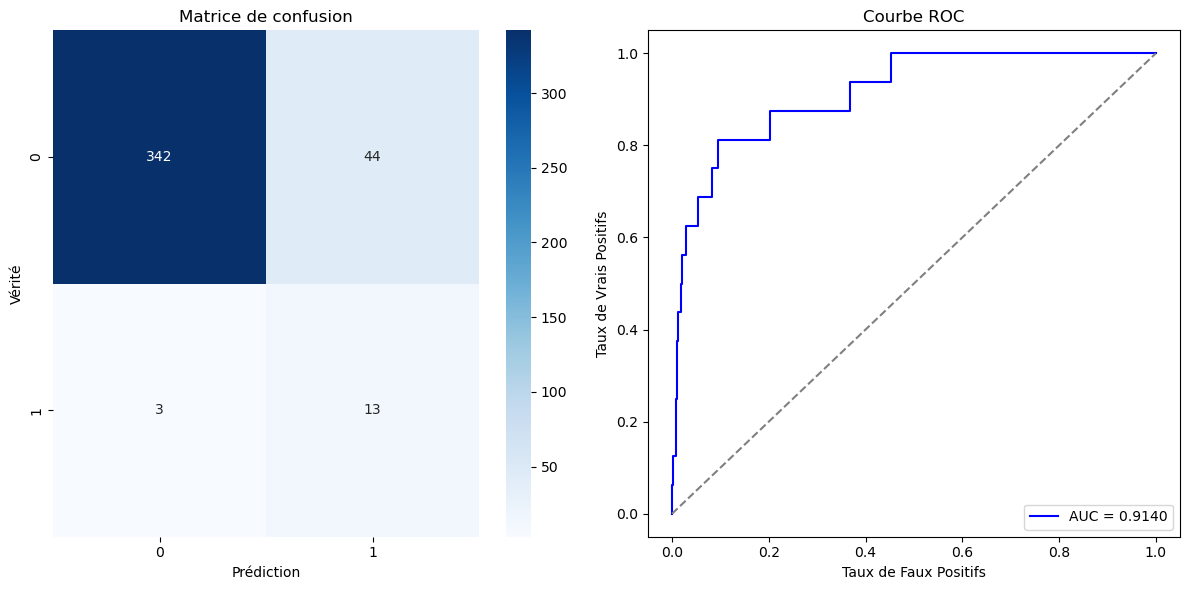

In [56]:
#Logistic regression
plot_confusion_matrix_and_roc_row(base_models[0], X_test, y_test)

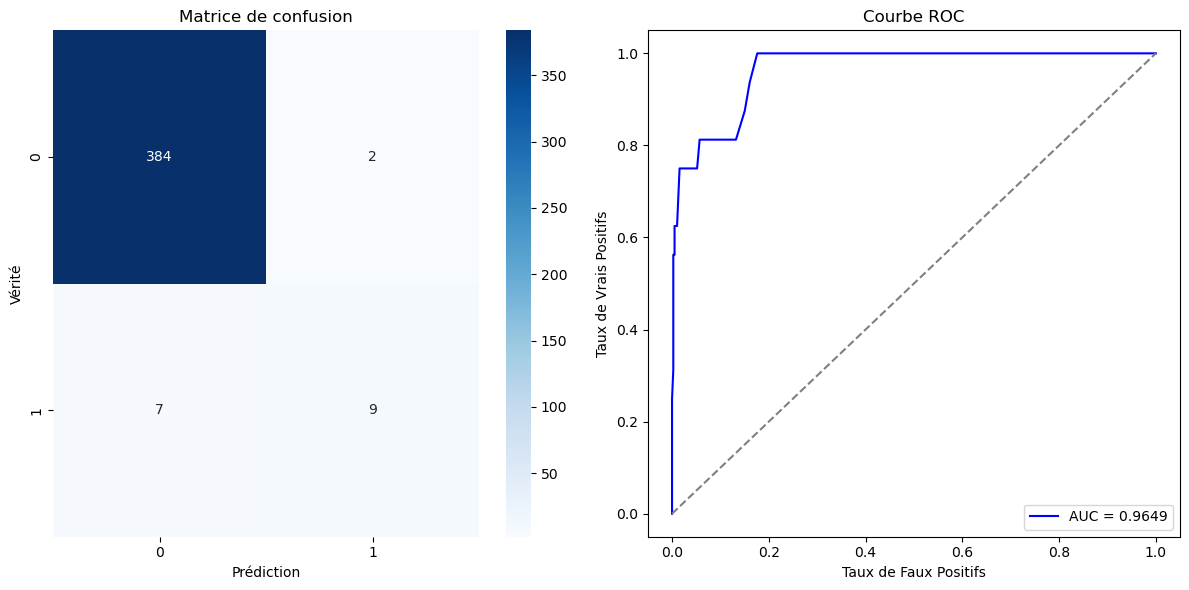

In [57]:
#random forest
plot_confusion_matrix_and_roc_row(base_models[1], X_test, y_test)

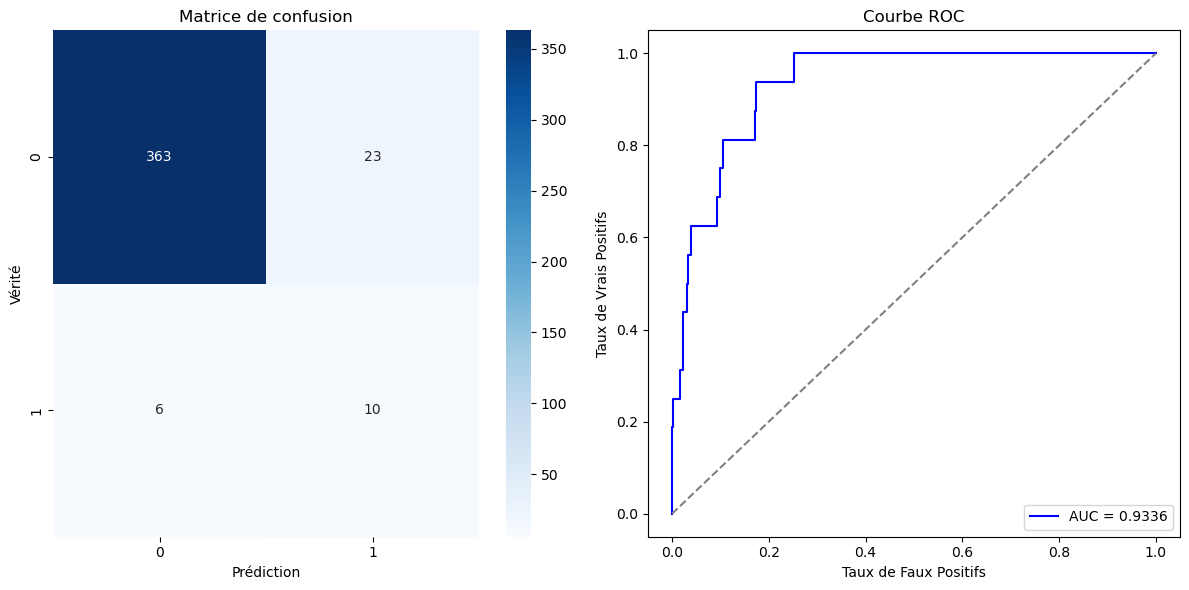

In [58]:
#SVM
plot_confusion_matrix_and_roc_row(base_models[2], X_test, y_test)

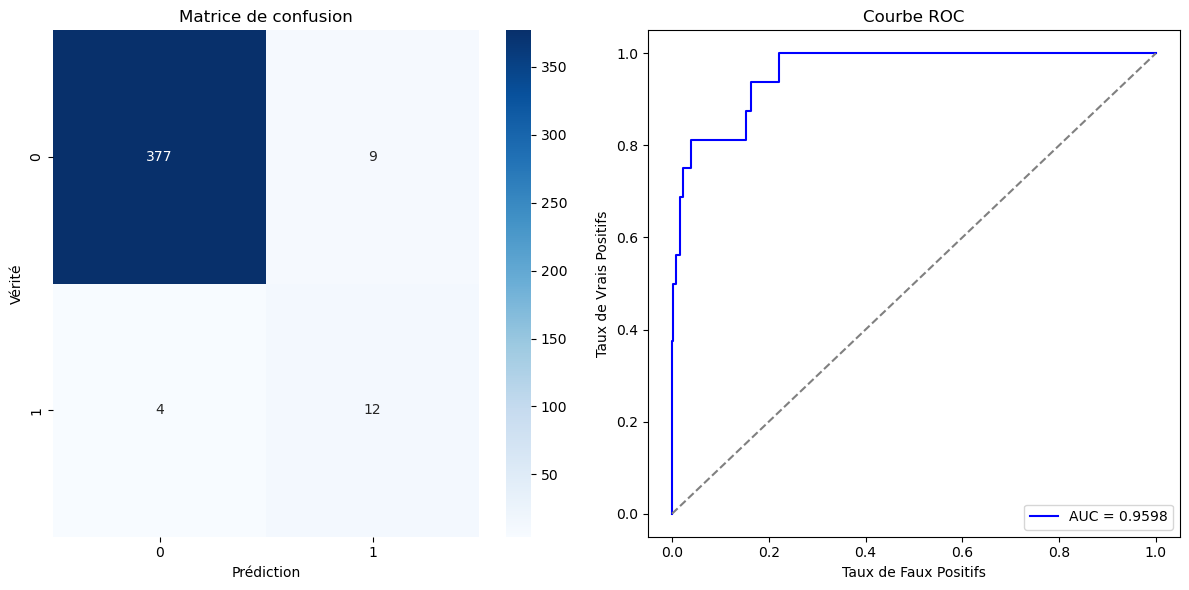

In [59]:
#Gradient Boosting
plot_confusion_matrix_and_roc_row(base_models[3], X_test, y_test)

La nature "en zigzag" de la courbe ROC est normale, surtout que nous travaillons avec des données déséquilibrées. Les "zigzags" sont le résultat des différents seuils de classification utilisés pour calculer le taux de vrais positifs et de faux positifs. Chaque point sur la courbe ROC représente un seuil différent. Dans les ensembles de données déséquilibrés, où il y a beaucoup plus d'exemples dans une classe que dans l'autre, il est courant de voir plus de variation dans les taux de classification à différents seuils.

La fonction `plot_auc_distributions` prend en entrée une liste de tuples contenant le nom du modèle et sa liste de scores ROC AUC. Elle génère un graphique pour comparer les distributions des scores ROC AUC entre différents modèles.

- **Entrée :**
  - `model_AUCs_list`: Liste de tuples (nom du modèle, scores ROC AUC).

- **Graphique :**
  - Utilise la fonction de densité kernel (`sns.kdeplot`) pour afficher la distribution des scores ROC AUC de chaque modèle.
  - Ajoute une ligne en pointillés à la valeur maximale de la distribution pour chaque modèle.
  - La légende indique le nom de chaque modèle.
  - L'axe des x représente les scores ROC AUC, et l'axe des y représente la densité.


In [60]:
def plot_roc_curves(models, X_test, y_test, model_names):
    plt.figure(figsize=(10, 8))

    for i, model in enumerate(models):
        y_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f'{model_names[i]} (AUC = {roc_auc:.4f})')

    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.title("Comparaison des courbes ROC")
    plt.xlabel("Taux de Faux Positifs")
    plt.ylabel("Taux de Vrais Positifs")
    plt.legend(loc="lower right")
    plt.show()


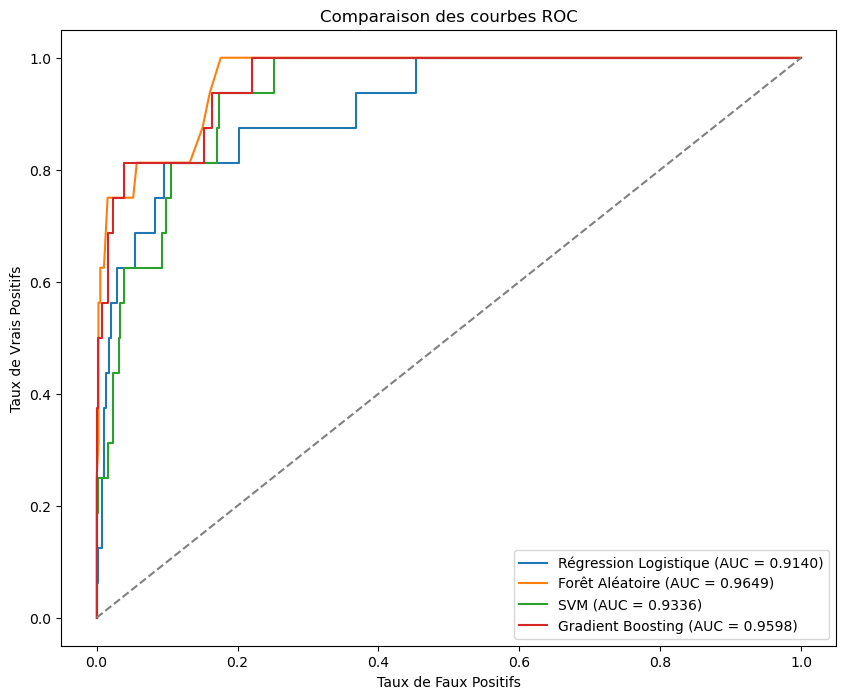

In [61]:
model_names = ["Régression Logistique", "Forêt Aléatoire", "SVM", "Gradient Boosting"]
plot_roc_curves(base_models, X_test, y_test, model_names)

### **Les Modeles aprés Cross Validation**

Dans cette section, nous effectuons une optimisation des hyperparamètres pour chaque modèle à l'aide de GridSearchCV. Les grilles de recherche spécifiques à chaque modèle sont définies comme suit :

- **Régression Logistique (`pp_logreg`):**
  - Paramètres à optimiser : `C` (inverse de la force de régularisation) et `penalty` (type de régularisation).

- **Random Forest (`pp_rf`):**
  - Paramètres à optimiser : `n_estimators` (nombre d'arbres), `max_depth` (profondeur maximale d'un arbre), `min_samples_split` (nombre minimal d'échantillons requis pour diviser un nœud), `min_samples_leaf` (nombre minimal d'échantillons requis dans une feuille).

- **SVM (`pp_svm`):**
  - Paramètres à optimiser : `C` (paramètre de régularisation), `gamma` (coefficient du noyau), `kernel` (type de noyau).

- **Gradient Boosting (`pp_gb`):**
  - Paramètres à optimiser : `n_estimators` (nombre d'itérations), `learning_rate` (taux d'apprentissage), `max_depth` (profondeur maximale d'un arbre), `min_samples_split` (nombre minimal d'échantillons requis pour diviser un nœud), `min_samples_leaf` (nombre minimal d'échantillons requis dans une feuille).

Une fois les grilles de recherche définies, la validation croisée est effectuée pour chaque modèle afin de sélectionner les meilleurs hyperparamètres. Les meilleurs modèles sont stockés dans la liste `best_models`. Le temps total consacré à cette optimisation des hyperparamètres est également affiché.


In [62]:
grid_logreg = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2', None]
}

grid_rf = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 5, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

grid_svm = {
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [0.001, 0.01, 0.1, 1],
    'classifier__kernel': ['rbf', 'linear']
}

grid_gb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 8],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [63]:
# Mapping des modeles et leurs grids
model_grids = {
    pp_logreg: grid_logreg,
    pp_rf: grid_rf,
    pp_svm: grid_svm,
    pp_gb: grid_gb
}

start = time.time()

best_models = []

for model, grid in model_grids.items():
    
    start_grid = time.time()
    
    search = GridSearchCV(estimator=model,
                          param_grid=grid,
                          scoring='roc_auc',
                          cv=3,  
                          verbose=0,
                          n_jobs=-1)
    search.fit(X_train, y_train)
    best_models.append(search.best_estimator_)
    
    end_grid = time.time()
    
    print(f"Temps pour la validation croissée du modèle {(end_grid - start_grid):.4f} seconds")

end = time.time()

print("____________________________________________")
print(f"Temps pour la validation croissée total: {(end - start):.4f} seconds")

C:\Users\Pc\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Temps pour la validation croissée du modèle 20.1951 seconds
Temps pour la validation croissée du modèle 42.6989 seconds
Temps pour la validation croissée du modèle 77.0077 seconds
Temps pour la validation croissée du modèle 326.7098 seconds
____________________________________________
Temps pour la validation croissée total: 466.6115 seconds


In [64]:
print(best_models)

[Pipeline(steps=[('scaler', StandardScaler()),
                ('ros',
                 RandomOverSampler(random_state=42, sampling_strategy=0.5)),
                ('classifier',
                 LogisticRegression(C=0.01, max_iter=10000, penalty=None,
                                    random_state=42, solver='sag'))]), Pipeline(steps=[('scaler', StandardScaler()),
                ('ros',
                 RandomOverSampler(random_state=42, sampling_strategy=0.5)),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_split=5,
                                        random_state=42))]), Pipeline(steps=[('scaler', StandardScaler()),
                ('ros',
                 RandomOverSampler(random_state=42, sampling_strategy=0.5)),
                ('classifier',
                 SVC(C=1, gamma=0.01, probability=True, random_state=42))]), Pipeline(steps=[('scaler', StandardScaler()),
                ('ros',
                 RandomOverSampler(ra

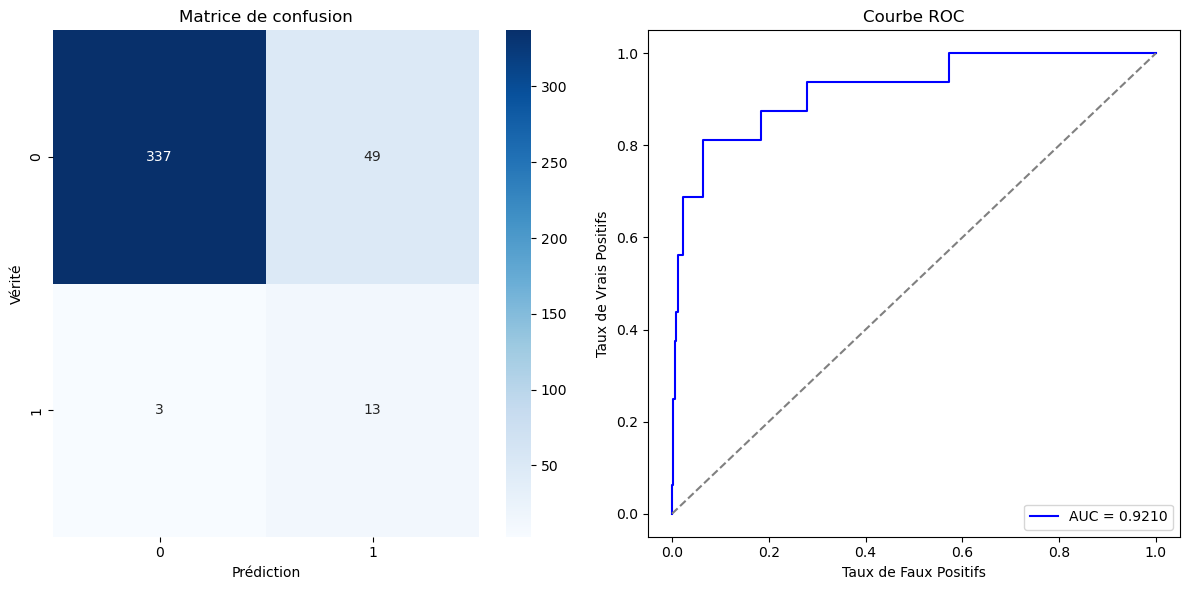

In [65]:
#Logistic regression
plot_confusion_matrix_and_roc_row(best_models[0], X_test, y_test)

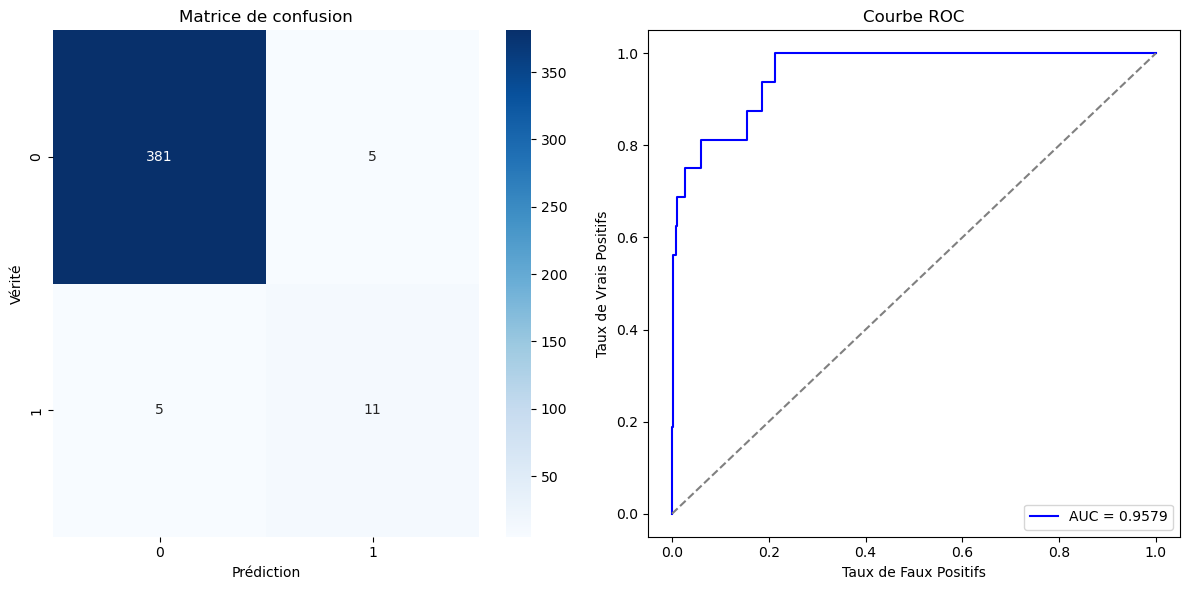

In [66]:
#random forest
plot_confusion_matrix_and_roc_row(best_models[1], X_test, y_test)

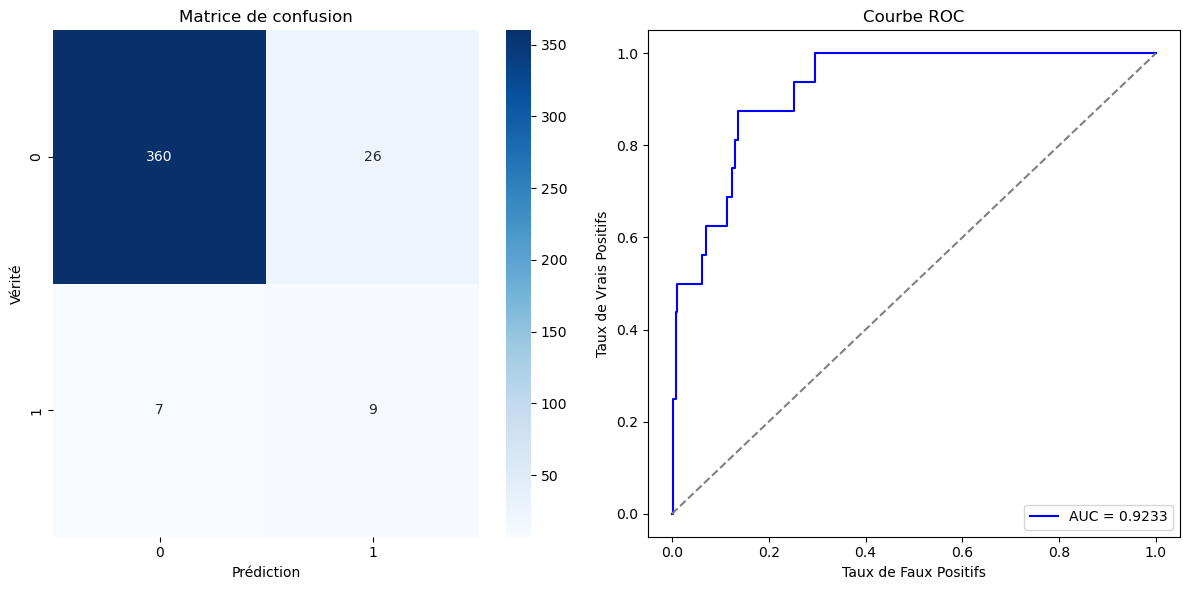

In [67]:
#SVM
plot_confusion_matrix_and_roc_row(best_models[2], X_test, y_test)

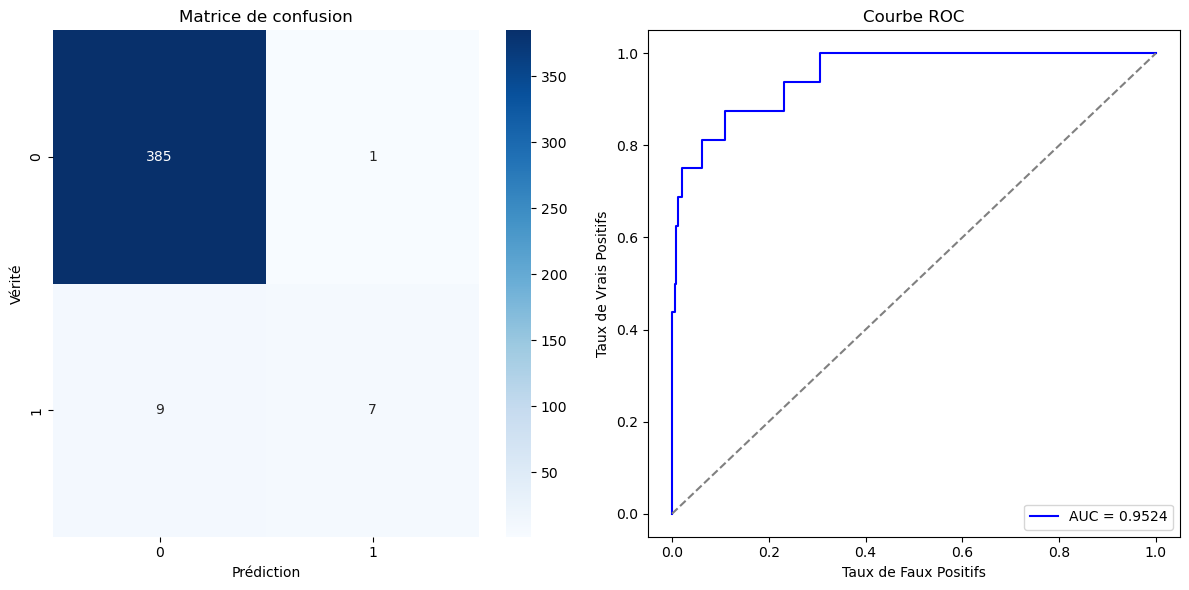

In [68]:
#Gradient boosting
plot_confusion_matrix_and_roc_row(best_models[3], X_test, y_test)

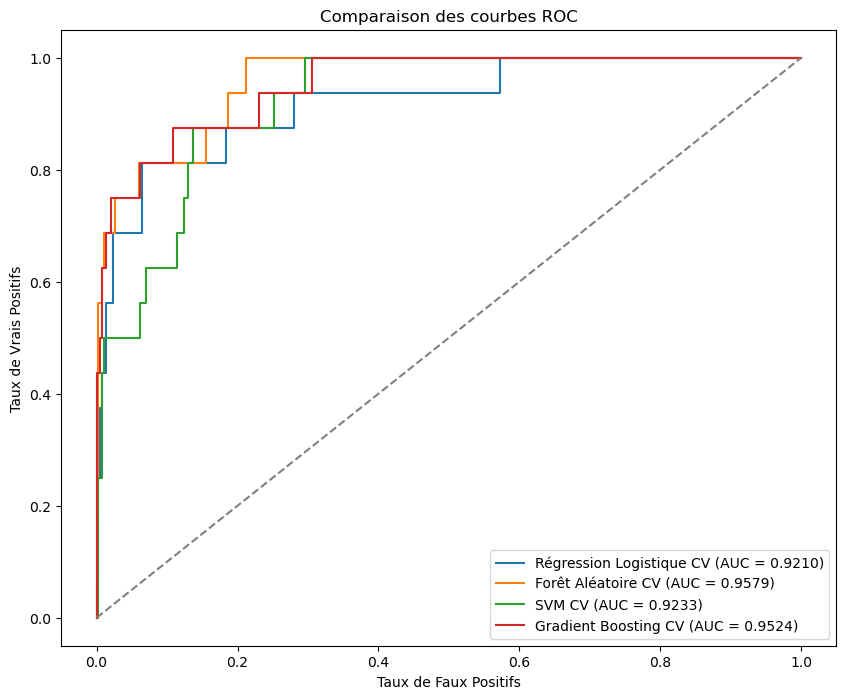

In [69]:
model_names = ["Régression Logistique CV", "Forêt Aléatoire CV", "SVM CV", "Gradient Boosting CV"]
plot_roc_curves(best_models, X_test, y_test, model_names)

## **Conclusion**

### **Résumé du Projet**

#### Nettoyage et Analyse Exploratoire des Données
- Nous avons commencé par nettoyer et préparer les datasets, en éliminant les valeurs manquantes et en examinant la distribution des données.
- L'analyse exploratoire a révélé des insights importants sur les comportements des enchérisseurs et les caractéristiques des enchères.

#### Création des Caractéristiques
- Des caractéristiques pertinentes ont été extraites pour capturer les nuances du comportement des enchérisseurs, en mettant l'accent sur les différences entre les bots et les humains.
- Nous avons utilisé des techniques avancées comme le calcul des différences temporelles et l'analyse des enchères concurrentes.

#### Modélisation et Évaluation des Performances
- Plusieurs modèles de machine learning ont été appliqués, notamment la Régression Logistique, RandomForest, SVM, et Gradient Boosting.
- Nous avons géré le déséquilibre des données avec un over-sampling et optimisé les modèles à l'aide de GridSearchCV.
- Les performances ont été évaluées en utilisant des métriques telles que l'AUC, les matrices de confusion, et les courbes ROC.

#### Résultats et Implications
- Les modèles optimisés ont montré des performances supérieures, indiquant leur efficacité dans la distinction entre les enchères humaines et robotiques.
- Cette étude a des implications importantes pour la sécurité et l'intégrité des plateformes de vente aux enchères en ligne, en aidant à détecter et à prévenir les activités frauduleuses.

#### Perspectives
Ce projet a démontré l'importance et l'efficacité de l'application de techniques de machine learning pour résoudre des problèmes complexes et actuels.